In [1]:
map_file_name = 'emptyMap.map'
scen_file_name = 'emptyMap.scen'
answer_file_name = map_file_name + '.ans'

In [2]:
import os.path
from pathlib import Path
import numpy as np


In [3]:
res_folder = Path().cwd().parents[0] / 'data'

In [4]:
import reader as reader

MAP = reader.read_map(res_folder / map_file_name)
SCEN = reader.read_scen(res_folder / scen_file_name)
RES = reader.read_res(res_folder / answer_file_name)
#M = reader.read_map("minimap.txt")
#S = reader.read_res("minires.txt")

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from animation import animate_list
from draw_filling import draw_filling
from show_map import show_map

In [6]:
animate_list(list(map(draw_filling, show_map(MAP, SCEN, RES, withPath=True))), play=True);

interactive(children=(IntSlider(value=0, description='step', max=10), Output()), _dom_classes=('widget-interac…

In [6]:
import reader as reader

In [8]:
z = reader.read_benchmark_tmp(res_folder / "mem.out")

In [9]:
print(z)

[('CBS', [(2, 40), (4, 40), (8, 39), (12, 35), (16, 30), (20, 17), (24, 4)]), ('CBS+DS', [(2, 40), (4, 40), (8, 40), (12, 39), (16, 35), (20, 17), (24, 3)]), ('CBS+DS+RANDOM', [(2, 40), (4, 40), (8, 40), (12, 40), (16, 36), (20, 18), (24, 2)]), ('CBS+DS+WIDTH', [(2, 40), (4, 40), (8, 40), (12, 39), (16, 34), (20, 16), (24, 3)]), ('CBS+PC', [(2, 40), (4, 40), (8, 39), (12, 35), (16, 30), (20, 16), (24, 3)]), ('CBS+PC+DS', [(2, 40), (4, 40), (8, 40), (12, 40), (16, 35), (20, 21), (24, 5)]), ('CBS+PC+DS+RANDOM', [(2, 40), (4, 40), (8, 40), (12, 39), (16, 34), (20, 22), (24, 4)]), ('CBS+PC+DS+WIDTH', [(2, 40), (4, 40), (8, 40), (12, 40), (16, 35), (20, 21), (24, 5)]), ('CBS+PC+RANDOM', [(2, 40), (4, 40), (8, 39), (12, 35), (16, 30), (20, 17), (24, 4)]), ('CBS+RANDOM', [(2, 40), (4, 40), (8, 39), (12, 35), (16, 30), (20, 17), (24, 4)]), ('CBSH', [(2, 40), (4, 40), (8, 39), (12, 35), (16, 29), (20, 12), (24, 3)]), ('CBSH+DS', [(2, 40), (4, 40), (8, 40), (12, 38), (16, 35), (20, 19), (24, 5)]

In [89]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'


def show_progress(t):
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 5))
    for i, algo in enumerate(t):
    #fig.suptitle(f'Epoch {t:3.3f}', fontsize=16)
        ax.set_ylabel('Success rate')
        ax.set_xlabel('Number of agents')
        agents = list(map(lambda x: x[0], algo[1]))
        success_rate = list(map(lambda x: x[1] / 40.0, algo[1]))
        ax.plot(agents, success_rate, marker = 'o', label=algo[0])
    ax.legend()
    plt.show()    

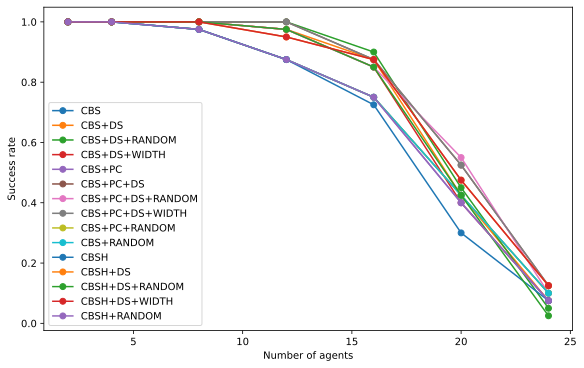

In [90]:
show_progress(z)

In [91]:
def get_results(t, names):
    res = []
    zz = dict(t)
    for name in names:
         res.append((name, zz[name]))
    return res

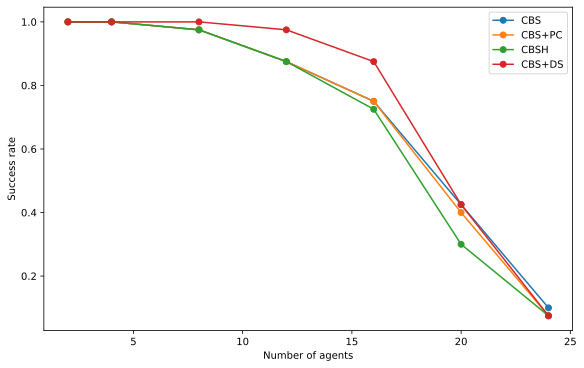

In [93]:
show_progress(get_results(z, ['CBS', 'CBS+PC', 'CBSH', 'CBS+DS']))

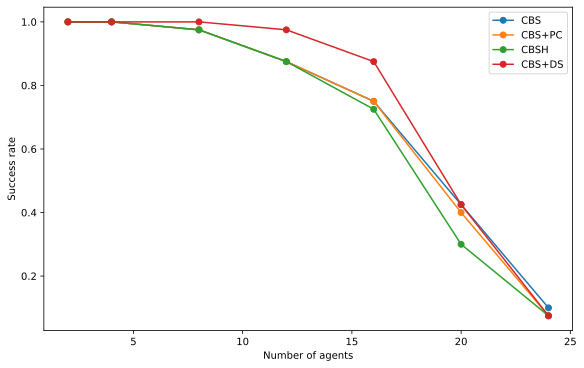

In [97]:
show_progress(get_results(z, ['CBS', 'CBS+PC', 'CBSH', 'CBS+DS']))

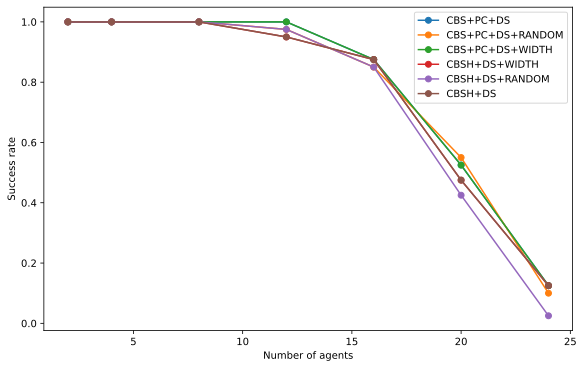

In [100]:
show_progress(get_results(z, ['CBS+PC+DS', 'CBS+PC+DS+RANDOM', 'CBS+PC+DS+WIDTH', 'CBSH+DS+WIDTH', 'CBSH+DS+RANDOM', 'CBSH+DS']))

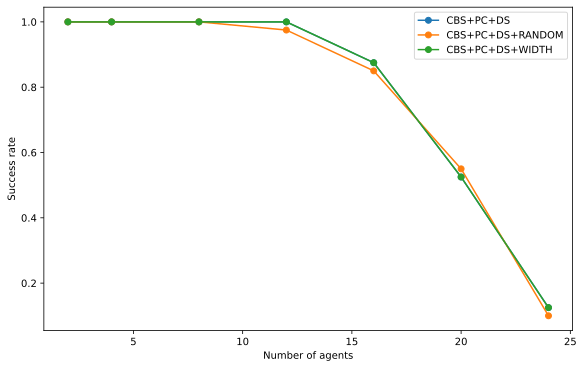

In [101]:
show_progress(get_results(z, ['CBS+PC+DS', 'CBS+PC+DS+RANDOM', 'CBS+PC+DS+WIDTH']))